In [3]:
%load_ext ipydex.displaytools
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import sys
sys.path.append('/Users/brandonhosley/Documents/GitHub/Schoolwork/2023Q2 - Statistical Machine Learning/Project First Draft')
import ProjectFunctions as PF

The ipydex.displaytools extension is already loaded. To reload it, use:
  %reload_ext ipydex.displaytools


In [4]:
randState = 42

df = pd.read_csv('../../Datasets/diabetes_data.csv')
df.head()

label = 'Diabetes'
fields=['Rho','Imbalance Technique','Classifier','Training f1','Test f1',
        'Runtime','Minority Count','k','n-Estimators','MaxDepth','MaxFeatures']
filename = 'test_results.csv'

df = PF.scrub_diabetes(df)

#PF.newFile('UndersamplingTechniques.csv', fields)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [6]:
for tech in [PF.Undersample]:  #PF.OneSided,PF.Near_Miss,PF.Tomek_Links
    for classifier in [ PF.ExtraTrees]: #PF.KNN,PF.DecisionTree,PF.RandomForest,
        for _ in range(10):
            for i in list(range(1,10,2))+list(range(10,99,10))+list(range(100,501,25)):
                PF.test(df, i, tech, classifier, fields, filename='UndersamplingTechniques.csv')


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  wa

Visualizing the Undersampling

<AxesSubplot:xlabel='Rho', ylabel='Test f1'>

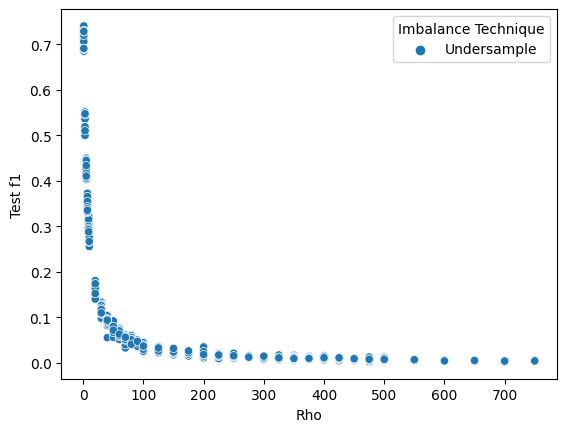

In [5]:
tr = pd.read_csv('UndersamplingTechniques.csv')

sns.scatterplot(x='Rho',y='Test f1', hue='Imbalance Technique', data=tr)
plt.xscale('log')